# Clustering Basado en Aprendizaje No supervisado


El aprendizaje automático no supervisado es la tarea de aprendizaje automático de inferir una función para describir la estructura oculta a partir de datos <b>"no etiquetados"</b> (una clasificación o categorización no se incluye en las observaciones). Los escenarios comunes para usar algoritmos de aprendizaje no supervisados incluyen:
- Exploración de datos
- Detección de valores atípicos
- Reconocimiento de patrones
Si bien hay una lista exhaustiva de algoritmos de agrupación disponibles trataremos de cubrir los conceptos básicos.

## K-Means

El algoritmo de agrupamiento más común y simple que existe es el agrupamiento de K-Means. Estos algoritmos implican que le digas a los algoritmos cuántos posibles grupos (o K) hay en el conjunto de datos. El algoritmo mueve iterativamente los centros k y selecciona los puntos de datos que están más cerca de ese centroide en el grupo.

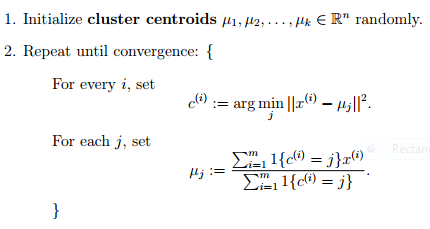

Tomando K = 3 como ejemplo:  

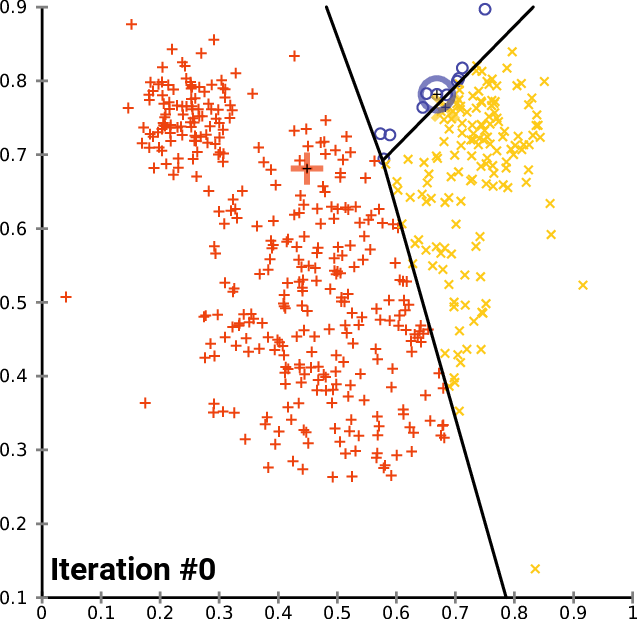

Pero y como determinamos que valor debera tener K?

Esto se hace usando una <b>curva de codo</b>, donde el eje x es el valor K y el eje y es alguna función objetiva. Una función objetivo común es la distancia promedio entre los puntos de datos y el centroide más cercano.

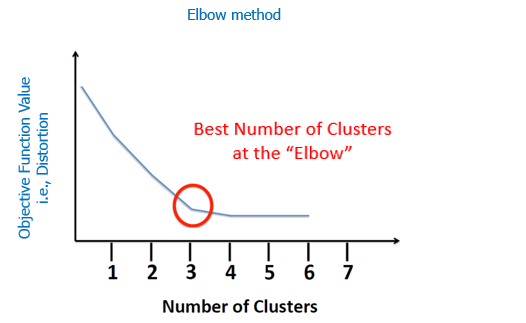

El mejor número para K es el "elbow" o región torcida. Después de este punto, generalmente se establece que agregar más clústeres no agregará un valor significativo a su análisis.

# Que es el metodo Elbow?

La teoría de la distorsión de velocidad se ha aplicado a la elección de <b>k</b> denominado método de "salto", que determina la cantidad de conglomerados que maximiza la eficiencia y minimiza el error según los estándares de la teoría de la información. La estrategia del algoritmo es generar una curva de distorsión para los datos de entrada ejecutando un algoritmo de agrupamiento estándar como k-means para todos los valores de k entre 1 y n, y calculando <b>la distorsión  del agrupamiento</b> resultante. La curva de distorsión se transforma mediante una potencia negativa elegida en función de la dimensionalidad de los datos. Los saltos en los valores resultantes significan opciones razonables para k, y el salto más grande representa la mejor opción.


Ejemplo del metodo Elbow (https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html)

In [30]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [31]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 3, 8, 6, 2, 6, 7, 1, 1, 1, 2, 3, 2, 3])

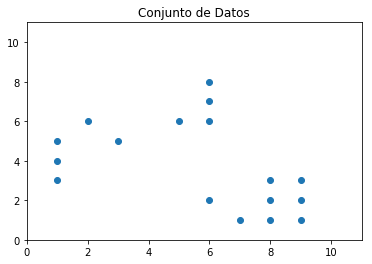

In [32]:
plt.plot()
plt.xlim([0, 11])
plt.ylim([0, 11])
plt.title('Conjunto de Datos')
plt.scatter(x1, x2)
plt.show()


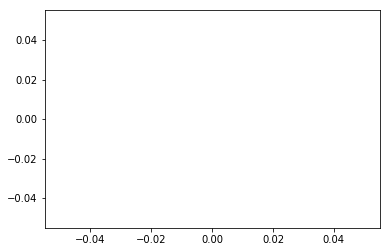

In [33]:
# crear plot 
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)


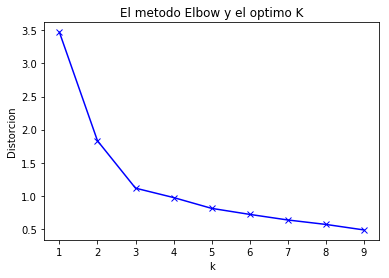

In [34]:
# k means determinar k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
# Plot el elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorcion')
plt.title('El metodo Elbow y el optimo K')


plt.show()

## Ejemplo
Utilizando el codigo anterior busca el K ideal para el dataset del Iris


In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import datasets

from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
Rango = range(1,10)

#leer dataset 
iris = datasets.load_iris()
irisdata = iris.data



## Analisis de Datos

Basado en el modelo análisis discriminante de Fisher, este conjunto de datos se convirtió en un caso de prueba típico por muchas técnicas clasificaciones estadísticas en aprendizaje automático como en máquinas de vectores de soporte.

Sin embargo, el uso de este conjunto de datos en algoritmos de agrupamiento no es común porque el conjunto de datos sólo contiene dos racimos, con una separación obvia y clara. Uno de los racimos contiene Iris setosa, mientras el otro contiene ambos Iris virginica y Iris versicolor y no es separable sino que uno tiene la información de especies usadas por Fisher. Esto hace el conjunto de datos un ejemplo bueno para explicar la diferencia entre técnicas que se supervisan o no en la minería de datos: El modelo análisis discriminante sólo se puede obtener cuando la especie objeta se conoce: etiquetas de clase y racimos no son siempre lo mismo.

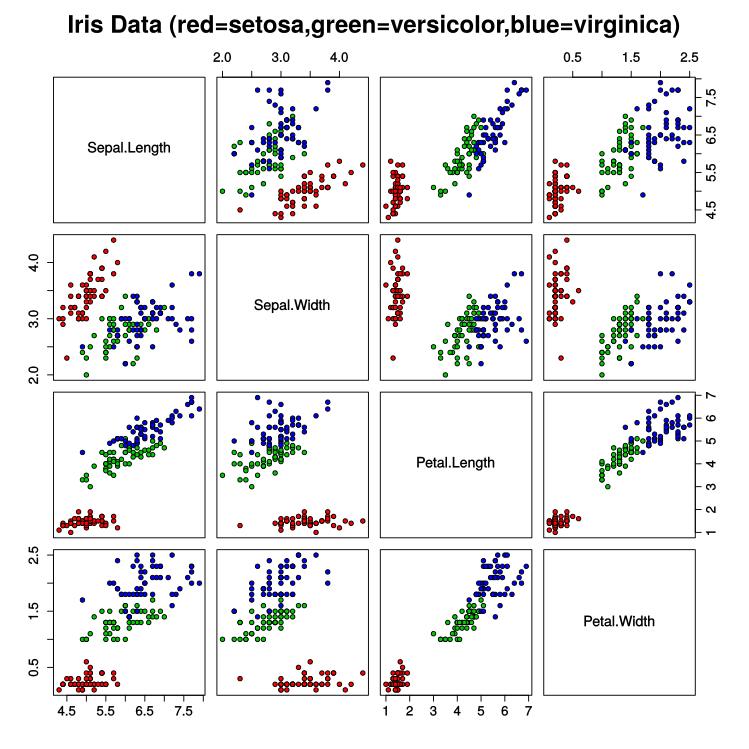

In [73]:

iris.data
iris.feature_names
iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [74]:
pd_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
pd_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [88]:
pd_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [75]:
x = pd.DataFrame(iris.data)
#print(x)

In [76]:
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
#print(x)


In [77]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
#print(y)

In [79]:
pd_iris.groupby('target').size()

target
0.0    50
1.0    50
2.0    50
dtype: int64

In [81]:
pd_iris['target'].unique()

array([0., 1., 2.])

In [84]:
setosa=pd_iris[pd_iris['target']==0.0]
versicolor =pd_iris[pd_iris['target']==1.0]
virginica =pd_iris[pd_iris['target']==2.0]

print(setosa.describe())
print(versicolor.describe())
print(virginica.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.418000           1.464000   
std              0.35249          0.381024           0.173511   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.125000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  target  
count          50.00000    50.0  
mean            0.24400     0.0  
std             0.10721     0.0  
min             0.10000     0.0  
25%             0.20000     0.0  
50%             0.20000     0.0  
75%             0.30000     0.0  
max             0.60000     0.0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          50.000000         50.000000 

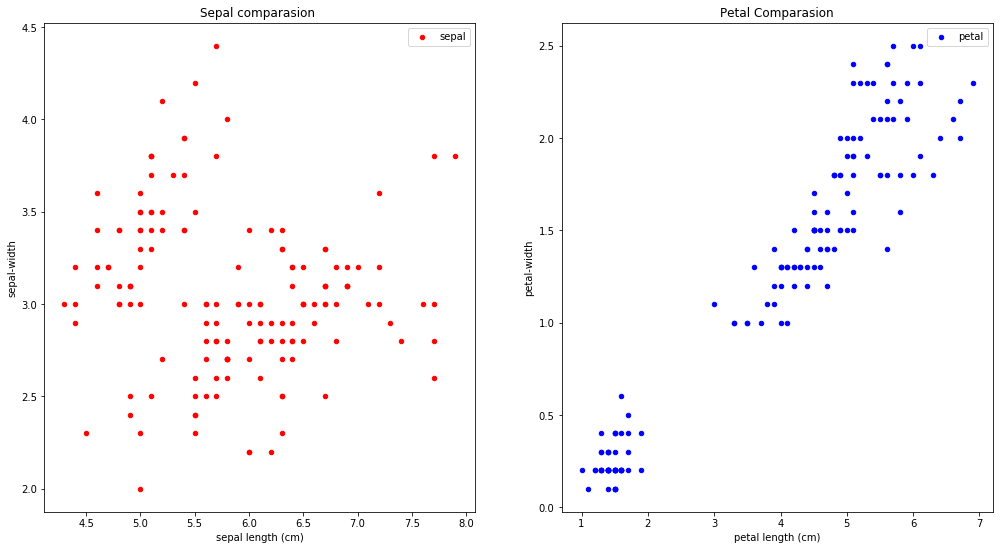

In [87]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(17, 9))
pd_iris.plot(x="sepal length (cm)",y="sepal width (cm)",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
pd_iris.plot(x="petal length (cm)",y="petal width (cm)",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

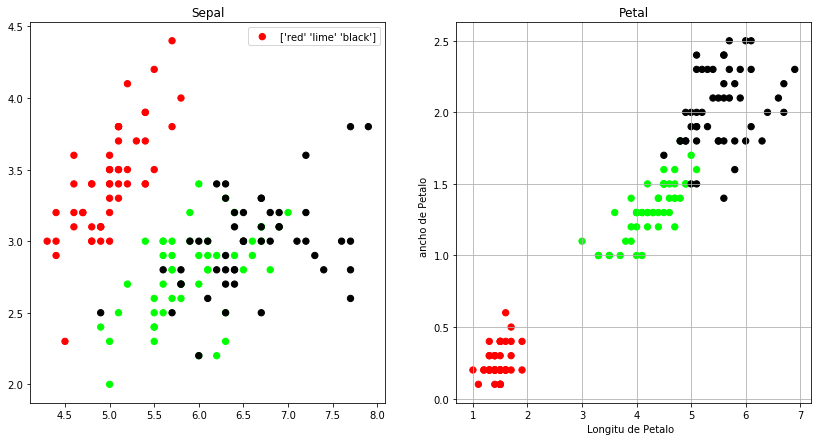

In [104]:

# fijar tamanio del plot
plt.figure(figsize=(14,7))
 
# asignar colores
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40,label=colormap)
plt.title('Sepal')

plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')
plt.xlabel("Longitud de Petalo  ")
plt.ylabel("ancho de Petalo  ")

plt.grid(True)

 A continuación se muestra un script de ejemplo utilizando K-Means Scikit-Learn en el conjunto de datos del iris

Text(0.5,0.92,'K Means')

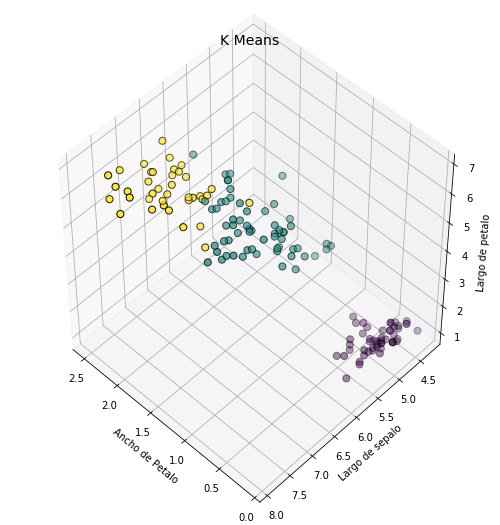

In [23]:


#KMeans
km = KMeans(n_clusters=3)
km.fit(irisdata)
km.predict(irisdata)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(irisdata[:, 3], irisdata[:, 0], irisdata[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Ancho de Petalo ")
ax.set_ylabel("Largo de sepalo")
ax.set_zlabel("Largo de petalo")
plt.title("K Means", fontsize=14)
